# Classification of features extracted with VGG16
These features are extracted at the end of the first fully connected layer.

In [25]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn
import matplotlib.pyplot as plt

We already have extracted the features from the dataset VGG16 pretrained model. We extracted them from the first fully connected layer. The shape of the features is (,4096).

In [4]:
model = ['allen','clamp','driver','flat','pen','screw','usb']
X=np.load('features_fc1/features.npy')
y=np.load('labels/labels.npy')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
# Number of training features
print(len(X_train), len(X_test), len(y_train), len(y_test))

392 168 392 168


Let's have a glance at the database and the different 5 conditions. 

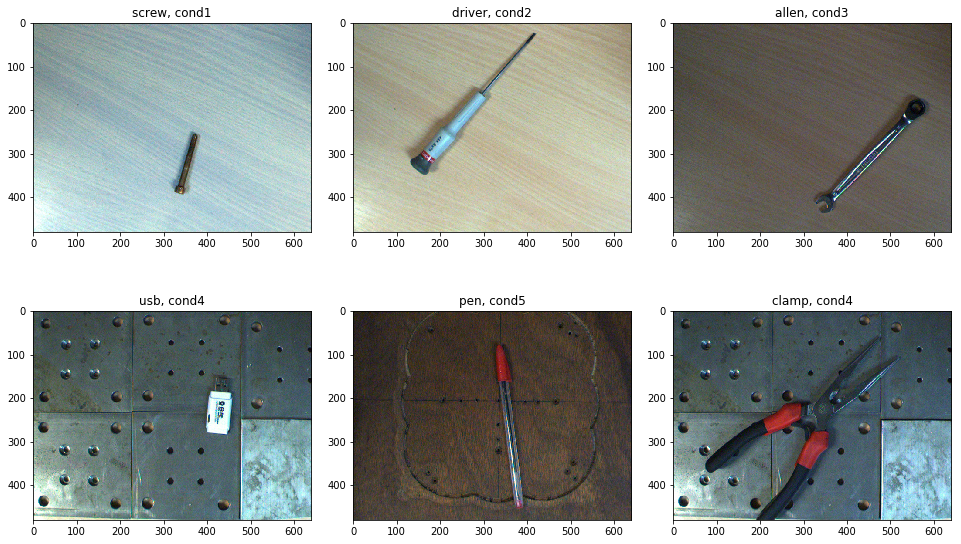

In [24]:
plt.figure(figsize=(15,10))


plt.subplot(231)
plt.imshow(plt.imread('tools/conditions1/screw/11.jpg'))
plt.title('screw, cond1')

plt.subplot(232)
plt.imshow(plt.imread('tools/conditions2/driver/11.jpg'))
plt.title('driver, cond2')

plt.subplot(233)
plt.imshow(plt.imread('tools/conditions3/flat/11.jpg'))
plt.title('allen, cond3')

plt.subplot(234)
plt.imshow(plt.imread('tools/conditions4/usb/11.jpg'))
plt.title('usb, cond4')

plt.subplot(235)
plt.imshow(plt.imread('tools/conditions5/pen/11.jpg'))
plt.title('pen, cond5')

plt.subplot(236)
plt.imshow(plt.imread('tools/conditions4/clamp/11.jpg'))
plt.title('clamp, cond4')

plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.95, hspace=0,
                    wspace=0.15)

plt.show()

Accuracy rbf:  0.946428571429
Accuracy lin:  0.97619047619


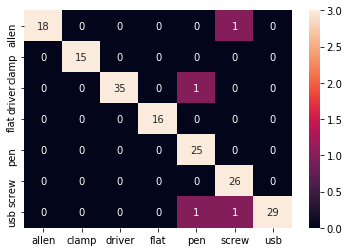

In [3]:
clf = svm.SVC(kernel='rbf',C=10,gamma=0.00005)
clfl= svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
clfl.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_predl = clfl.predict(X_test)
conf = confusion_matrix(y_predl,y_test, labels=model)
print('Accuracy rbf: ',accuracy_score(y_pred,y_test))
print('Accuracy lin: ',accuracy_score(y_predl,y_test))

confm = pd.DataFrame(conf,columns= model, index = model)
seaborn.heatmap(confm, vmax=3, annot=True)
plt.show()

## Woow the results seems to be really good!
But let's try to figure out if the solution is still robust when we change the conditions of the picture (low light, shapes in the background,...) 

# Test of robustness depending on conditions
We train the SVM model with 4 different conditions, and then we test it with the remaining condition.

# Test Condition1
We train the model with conditions 2,3,4,5 and test it with condition 1.

(448, 4096)
Accuracy rbf:  0.973214285714
Accuracy lin:  0.955357142857


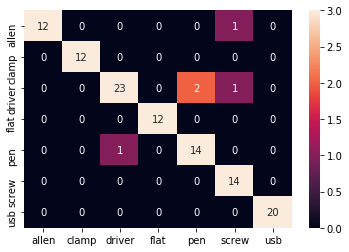

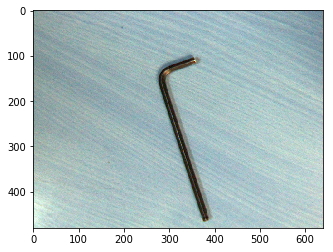

In [25]:
X_train = np.squeeze(np.concatenate((np.load('features_fc1/features_cond5.npy'),np.load('features_fc1/features_cond2.npy'),np.load('features_fc1/features_cond3.npy'),np.load('features_fc1/features_cond4.npy'))))
y_train = np.concatenate((np.load('labels/labels_cond5.npy') , np.load('labels/labels_cond2.npy') , np.load('labels/labels_cond3.npy') , np.load('labels/labels_cond4.npy')))
X_test = np.squeeze(np.load('features_fc1/features_cond1.npy'))
y_test = np.load('labels/labels_cond1.npy')
print(X_train.shape)

#y_train = y[0:449]
#y_test = y[449:]
clf = svm.SVC(kernel='rbf',C=10,gamma=0.00005)
clfl= svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
clfl.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_predl = clfl.predict(X_test)
conf = confusion_matrix(y_predl,y_test, labels=model)
print('Accuracy rbf: ',accuracy_score(y_pred,y_test))
print('Accuracy lin: ',accuracy_score(y_predl,y_test))

confm = pd.DataFrame(conf,columns= model, index = model)
seaborn.heatmap(confm, vmax=3, annot=True)
plt.show()

plt.clf()
plt.imshow(plt.imread('tools/conditions1/allen/11.jpg'))
plt.show()

# Test Condition2

(448, 4096)
Accuracy rbf:  0.982142857143
Accuracy lin:  0.991071428571


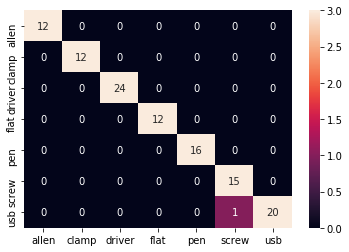

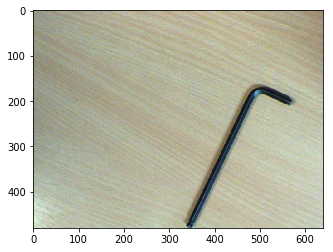

In [54]:
X_train = np.squeeze(np.concatenate((np.load('features_fc1/features_cond1.npy'),np.load('features_fc1/features_cond5.npy'),np.load('features_fc1/features_cond3.npy'),np.load('features_fc1/features_cond4.npy'))))
y_train = np.concatenate((np.load('labels/labels_cond1.npy') , np.load('labels/labels_cond5.npy') , np.load('labels/labels_cond3.npy') , np.load('labels/labels_cond4.npy')))
X_test = np.squeeze(np.load('features_fc1/features_cond2.npy'))
y_test = np.load('labels/labels_cond2.npy')
print(X_train.shape)

#y_train = y[0:449]
#y_test = y[449:]
clf = svm.SVC(kernel='rbf',C=10,gamma=0.000005)
clfl= svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
clfl.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_predl = clfl.predict(X_test)
conf = confusion_matrix(y_predl,y_test, labels=model)
print('Accuracy rbf: ',accuracy_score(y_pred,y_test))
print('Accuracy lin: ',accuracy_score(y_predl,y_test))

confm = pd.DataFrame(conf,columns= model, index = model)
seaborn.heatmap(confm, vmax=3, annot=True)
plt.show()

plt.clf()
plt.imshow(plt.imread('tools/conditions2/allen/11.jpg'))
plt.show()

# Test Condition3

(448, 4096)
Accuracy rbf:  0.910714285714
Accuracy lin:  0.919642857143


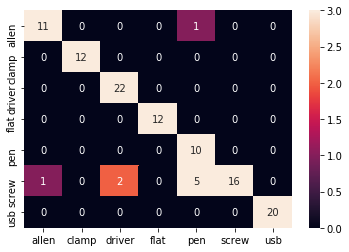

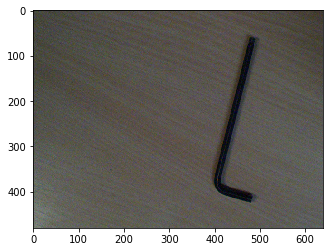

In [31]:
X_train = np.squeeze(np.concatenate((np.load('features_fc1/features_cond1.npy'),np.load('features_fc1/features_cond2.npy'),np.load('features_fc1/features_cond2.npy'),np.load('features_fc1/features_cond5.npy'))))
y_train = np.concatenate((np.load('labels/labels_cond1.npy') , np.load('labels/labels_cond2.npy') , np.load('labels/labels_cond2.npy') , np.load('labels/labels_cond5.npy')))
X_test = np.squeeze(np.load('features_fc1/features_cond3.npy'))
y_test = np.load('labels/labels_cond3.npy')
print(X_train.shape)

#y_train = y[0:449]
#y_test = y[449:]
clf = svm.SVC(kernel='rbf',C=10,gamma=0.000005)
clfl= svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
clfl.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_predl = clfl.predict(X_test)
conf = confusion_matrix(y_predl,y_test, labels=model)
print('Accuracy rbf: ',accuracy_score(y_pred,y_test))
print('Accuracy lin: ',accuracy_score(y_predl,y_test))

confm = pd.DataFrame(conf,columns= model, index = model)
seaborn.heatmap(confm, vmax=3, annot=True)
plt.show()

plt.clf()
plt.imshow(plt.imread('tools/conditions3/allen/11.jpg'))
plt.show()

# Test Condition4

(448, 4096)
Accuracy rbf:  0.589285714286
Accuracy lin:  0.383928571429


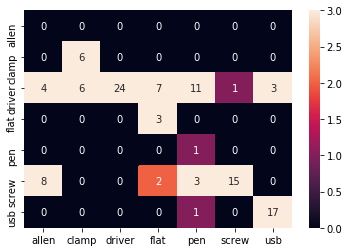

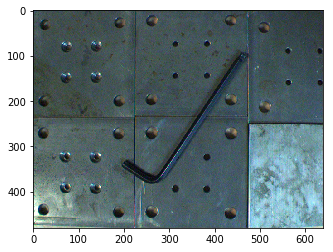

In [44]:
X_train = np.squeeze(np.concatenate((np.load('features_fc1/features_cond1.npy'),np.load('features_fc1/features_cond2.npy'),np.load('features_fc1/features_cond3.npy'),np.load('features_fc1/features_cond5.npy'))))
y_train = np.concatenate((np.load('labels/labels_cond1.npy') , np.load('labels/labels_cond2.npy') , np.load('labels/labels_cond3.npy') , np.load('labels/labels_cond5.npy')))
X_test = np.squeeze(np.load('features_fc1/features_cond4.npy'))
y_test = np.load('labels/labels_cond4.npy')
print(X_train.shape)

#y_train = y[0:449]
#y_test = y[449:]
clf = svm.SVC(kernel='rbf',C=10,gamma=0.0000005)
clfl= svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
clfl.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_predl = clfl.predict(X_test)
conf = confusion_matrix(y_pred,y_test, labels=model)
print('Accuracy rbf: ',accuracy_score(y_pred,y_test))
print('Accuracy lin: ',accuracy_score(y_predl,y_test))

confm = pd.DataFrame(conf,columns= model, index = model)
seaborn.heatmap(confm, vmax=3, annot=True)
plt.show()

plt.clf()
plt.imshow(plt.imread('tools/conditions4/allen/11.jpg'))
plt.show()

# Test Condition5

(448, 4096)
Accuracy rbf:  0.946428571429
Accuracy lin:  0.892857142857


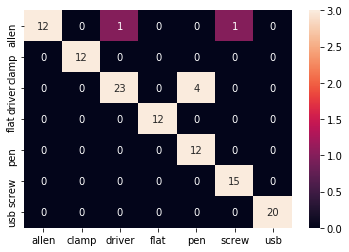

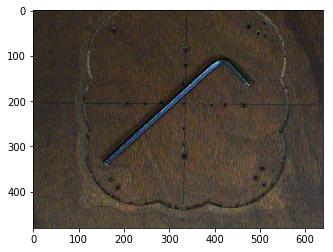

In [51]:
X_train = np.squeeze(np.concatenate((np.load('features_fc1/features_cond1.npy'),np.load('features_fc1/features_cond2.npy'),np.load('features_fc1/features_cond3.npy'),np.load('features_fc1/features_cond4.npy'))))
y_train = np.concatenate((np.load('labels/labels_cond1.npy') , np.load('labels/labels_cond2.npy') , np.load('labels/labels_cond3.npy') , np.load('labels/labels_cond4.npy')))
X_test = np.squeeze(np.load('features_fc1/features_cond5.npy'))
y_test = np.load('labels/labels_cond5.npy')
print(X_train.shape)

#y_train = y[0:449]
#y_test = y[449:]
clf = svm.SVC(kernel='rbf',C=10,gamma=0.000002)
clfl= svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
clfl.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_predl = clfl.predict(X_test)
conf = confusion_matrix(y_pred,y_test, labels=model)
print('Accuracy rbf: ',accuracy_score(y_pred,y_test))
print('Accuracy lin: ',accuracy_score(y_predl,y_test))

confm = pd.DataFrame(conf,columns= model, index = model)
seaborn.heatmap(confm, vmax=3, annot=True)
plt.show()

plt.clf()
plt.imshow(plt.imread('tools/conditions5/allen/11.jpg'))
plt.show()

# Conclusion
We see that the results are pretty good when the environnement is simple and uniform, with an accuracy very close to 1.
But when the model is not trained to a more difficult environment, like 4th, the results are really bad. The hole in the background totally disturbs the classifier, and the results are very bad.

However, if the model has alreadu seen such an environment, the results are still good. When the model is randomly trained with the 5 conditions, it has very good results (0.98 accuracy). 

But for a collaborative robot, the difference of environment can be infinite, so we need good results for any type of environments.
There is still work to do. A direction could be to detect the object, and then to focus the features detection on a close area around it.

## Note
The SVM classifier with 'rbm' has not always the same values of 'rbm'. The values indicated maximises the accuracy of the algorithm.